This package provides statistical tools specifically for survival analysis

In [1]:
!pip install lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 3.7 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=26c511f7fb4f80ab54cbbab318ca8b207c6204756b6935f11934ad1253d92fe1
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


# **Import Necessary Libraries**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
from sklearn.model_selection import GridSearchCV

# **Load the Dataset**

In [3]:
# Load the dataset
data = pd.read_csv('/content/Breast Cancer METABRIC.csv')

# **1. Data Exploration (EDA)**



* Detecting missing values
* Summarizing numerical data

*   Analyzing
distributions
*  Checking for outliers

*   **Exploring** correlations.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Patient ID                      2509 non-null   object 
 1   Age at Diagnosis                2498 non-null   float64
 2   Type of Breast Surgery          1955 non-null   object 
 3   Cancer Type                     2509 non-null   object 
 4   Cancer Type Detailed            2509 non-null   object 
 5   Cellularity                     1917 non-null   object 
 6   Chemotherapy                    1980 non-null   object 
 7   Pam50 + Claudin-low subtype     1980 non-null   object 
 8   Cohort                          2498 non-null   float64
 9   ER status measured by IHC       2426 non-null   object 
 10  ER Status                       2469 non-null   object 
 11  Neoplasm Histologic Grade       2388 non-null   float64
 12  HER2 status measured by SNP6    19

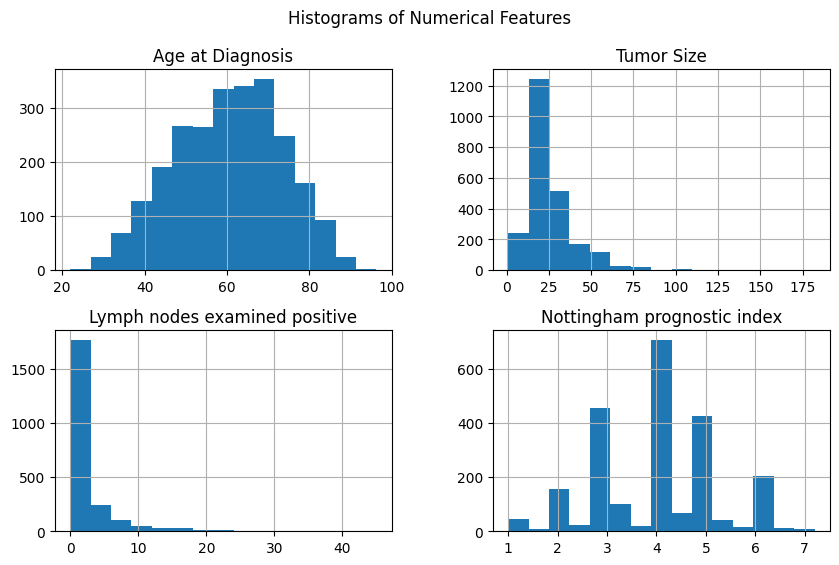

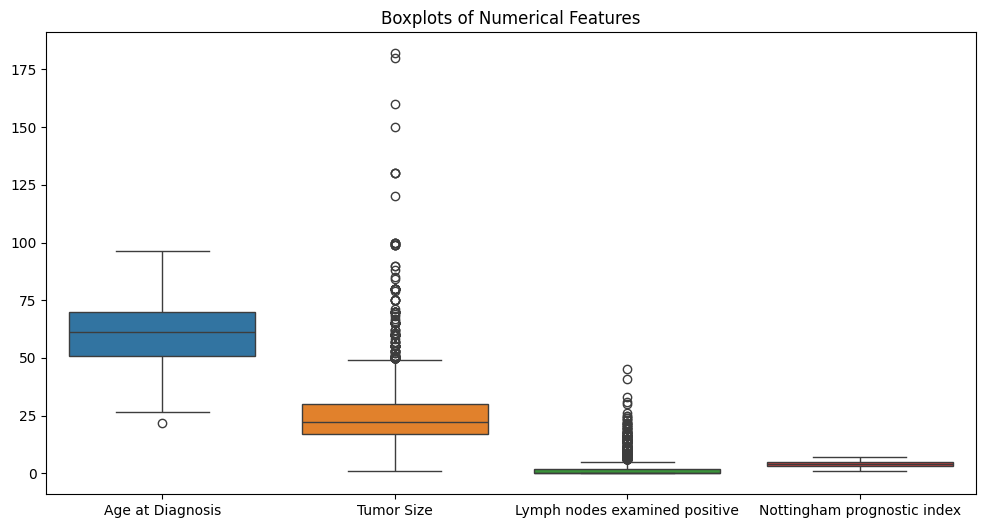

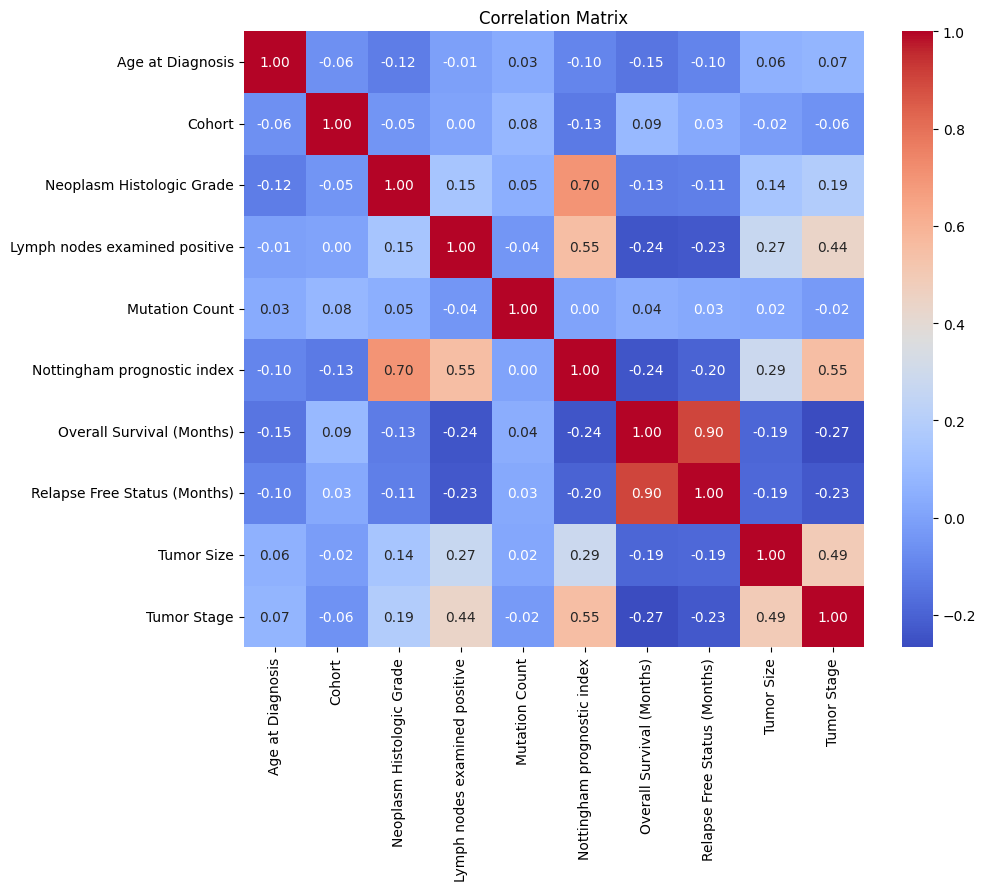

In [5]:
# Display basic information and check for missing values
print(data.info())
print(data.isnull().sum())

# Quick statistical overview
print(data.describe())
print(data.columns)
# Distribution of numerical features
numerical_features = ['Age at Diagnosis', 'Tumor Size', 'Lymph nodes examined positive', 'Nottingham prognostic index']
data[numerical_features].hist(bins=15, figsize=(10, 6))
plt.suptitle("Histograms of Numerical Features")
plt.show()

# Boxplots for numerical features to detect outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[numerical_features])
plt.title("Boxplots of Numerical Features")
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
numerical_data = data.select_dtypes(include=['number'])  # Select numerical columns

sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt='.2f') # Calculate correlation for numerical data
plt.title("Correlation Matrix")
plt.show()


# **2. Survival Analysis**

# **(a)Kaplan-Meier Survival**

Calculate survival probabilities for a population and groups based on the feature "ER Status"




<ipython-input-6-dee33b46eb4b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Overall Survival (Months)'].fillna(data['Overall Survival (Months)'].mean(), inplace=True)


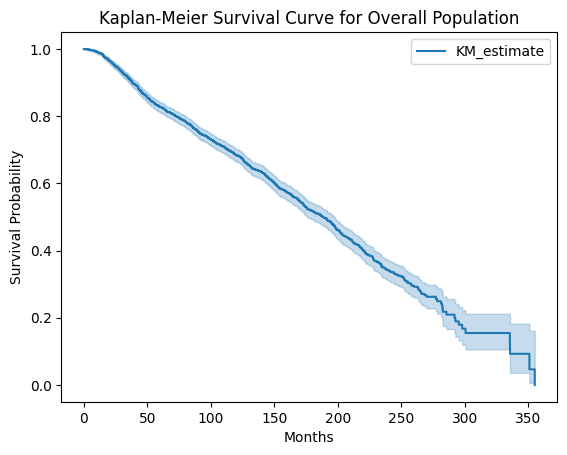

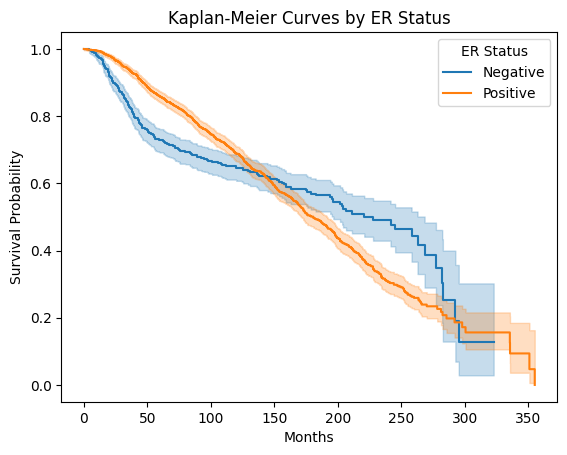

In [6]:
data['Overall Survival (Months)'].fillna(data['Overall Survival (Months)'].mean(), inplace=True)

# Instantiate the KaplanMeierFitter
kmf = KaplanMeierFitter()

# Kaplan-Meier Survival Curve for the whole population
kmf.fit(durations=data['Overall Survival (Months)'], event_observed=data['Overall Survival Status'] == 'Deceased')
kmf.plot()
plt.title("Kaplan-Meier Survival Curve for Overall Population")
plt.xlabel("Months")
plt.ylabel("Survival Probability")
plt.show()

# Kaplan-Meier Curves by groups (e.g., by ER Status)
for name, grouped_df in data.groupby('ER Status'):
    kmf.fit(grouped_df['Overall Survival (Months)'], event_observed=grouped_df['Overall Survival Status'] == 'Deceased', label=str(name))
    kmf.plot()

plt.title("Kaplan-Meier Curves by ER Status")
plt.xlabel("Months")
plt.ylabel("Survival Probability")
plt.legend(title="ER Status")
plt.show()


# **(b)Cox Proportional Hazards Model**

  Model for survival analysis, using several selected features to assess their association with survival time.

<ipython-input-7-6ea4422c8dab>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[feature].fillna(data[feature].mean(), inplace=True)


<lifelines.CoxPHFitter: fitted with 2509 total observations, 1365 right-censored observations>
             duration col = 'Overall Survival (Months)'
                event col = 'Event'
      baseline estimation = breslow
   number of observations = 2509
number of events observed = 1144
   partial log-likelihood = -7908.15
         time fit was run = 2024-11-13 14:24:22 UTC

---
                               coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                      
Age at Diagnosis               0.04      1.04      0.00            0.03            0.04                1.03                1.04
Tumor Size                     0.01      1.01      0.00            0.01            0.01                1.01                1.01
Lymph nodes examined positive  0.04      1.04      0.01            0.03            0.05                1.03                1.06
Nottingham prognostic index    0.16      1.18      0.03            0.11            0.22                1.11                1.25

                               cmp to     z      p  -log2(p)
covariate                                                   
Age at Diagnosis                 0.00 14.70 <0.005    160.17
Tumor Size                       0.00  5.46 <0.005     24.31
Lymph nodes examined positive    0.00  6.25 <0.005     31.20
Nottingham prognostic index      0.00  5.48 <0.005     24.45
---
Concordance = 0.66
Partial AIC = 15824.30
log-likelihood ratio test = 394.42 on 4 df
-log2(p) of ll-ratio test = 276.88

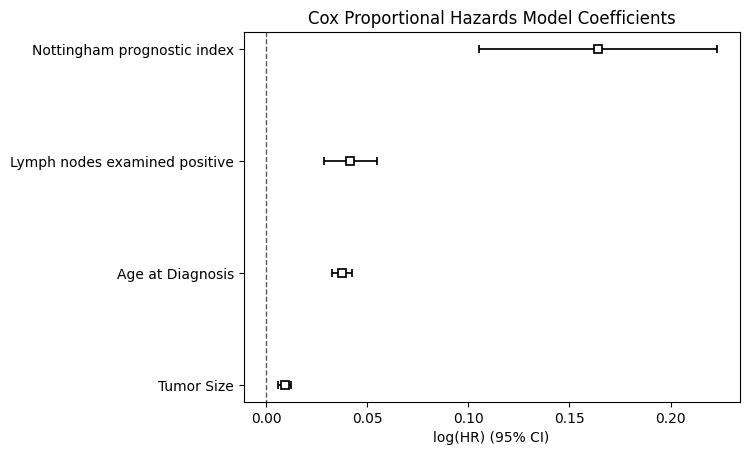

In [7]:
# Select features for the Cox model
cox_features = ['Age at Diagnosis', 'Tumor Size', 'Lymph nodes examined positive', 'Nottingham prognostic index']
cph = CoxPHFitter()
data['Event'] = data['Overall Survival Status'] == 'Deceased'
for feature in cox_features:
    data[feature].fillna(data[feature].mean(), inplace=True)
cph.fit(data[cox_features + ['Overall Survival (Months)', 'Event']], duration_col='Overall Survival (Months)', event_col='Event')
cph.print_summary()
cph.plot()
plt.title("Cox Proportional Hazards Model Coefficients")
plt.show()


# **3. Feature Engineering**

  Prepares data for a machine learning model predicting 10-Year Mortality in a clinical dataset by transforming and scaling features.

In [8]:
# Select relevant columns for the model
features = [
    'Age at Diagnosis', 'Type of Breast Surgery', 'Chemotherapy', 'Hormone Therapy',
    'ER Status', 'HER2 Status', 'Neoplasm Histologic Grade', 'PR Status',
    'Lymph nodes examined positive', 'Nottingham prognostic index', 'Tumor Size', 'Tumor Stage'
]
target = '10_Year_Mortality'

# Create 10-year mortality binary target variable
data['10_Year_Mortality'] = data.apply(lambda x: 1 if x['Overall Survival (Months)'] <= 120 and x['Overall Survival Status'] == 'Deceased' else 0, axis=1)

# Fill missing numerical values with the median
numerical_features = data[features].select_dtypes(include=['float64', 'int64']).columns
data[numerical_features] = data[numerical_features].fillna(data[numerical_features].median())

# Fill missing categorical values with mode and encode them
categorical_features = data[features].select_dtypes(include=['object']).columns
for col in categorical_features:
    data[col] = LabelEncoder().fit_transform(data[col].fillna(data[col].mode()[0]))

# Scale numerical features
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Check the preprocessed data
data_model = data[features + [target]]
print(data_model.head())


   Age at Diagnosis  Type of Breast Surgery  Chemotherapy  Hormone Therapy  \
0          1.171354                       1             0                1   
1         -1.325225                       0             0                1   
2         -0.888362                       1             1                1   
3         -0.979888                       1             1                1   
4          1.272878                       1             1                1   

   ER Status  HER2 Status  Neoplasm Histologic Grade  PR Status  \
0          1            0                   0.866523          0   
1          1            0                   0.866523          1   
2          1            0                  -0.681985          1   
3          1            0                  -0.681985          1   
4          1            0                   0.866523          1   

   Lymph nodes examined positive  Nottingham prognostic index  Tumor Size  \
0                       2.119411                   

# **4. Model Selection and Training**

 Sets up and trains three machine learning models (Logistic Regression, Decision Tree Classifier, and Support Vector Machine) to predict 10-year mortality based on selected features.

In [9]:
# Define X and y
X = data_model.drop(target, axis=1)
y = data_model[target]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models
logreg = LogisticRegression(max_iter=1000, random_state=42)
tree = DecisionTreeClassifier(random_state=42)
svm = SVC(probability=True, random_state=42)

# Train models
logreg.fit(X_train, y_train)
tree.fit(X_train, y_train)
svm.fit(X_train, y_train)


SVC(probability=True, random_state=42)

# **5. Performance Evaluation**

 Evaluates models  based on various performance metrics and visualizes ROC curves for two models with probabilistic outputs.

Performance of Logistic Regression:
Accuracy: 0.7463479415670651
Precision: 0.6090225563909775
Recall: 0.36818181818181817
F1 Score: 0.45892351274787535
ROC-AUC Score: 0.635310421286031
Confusion Matrix:
 [[481  52]
 [139  81]] 

Performance of Decision Tree:
Accuracy: 0.6414342629482072
Precision: 0.3949579831932773
Recall: 0.42727272727272725
F1 Score: 0.4104803493449782
ROC-AUC Score: 0.578551935869009
Confusion Matrix:
 [[389 144]
 [126  94]] 

Performance of SVM:
Accuracy: 0.7649402390438247
Precision: 0.7009345794392523
Recall: 0.3409090909090909
F1 Score: 0.45871559633027525
ROC-AUC Score: 0.6404357837284665
Confusion Matrix:
 [[501  32]
 [145  75]] 



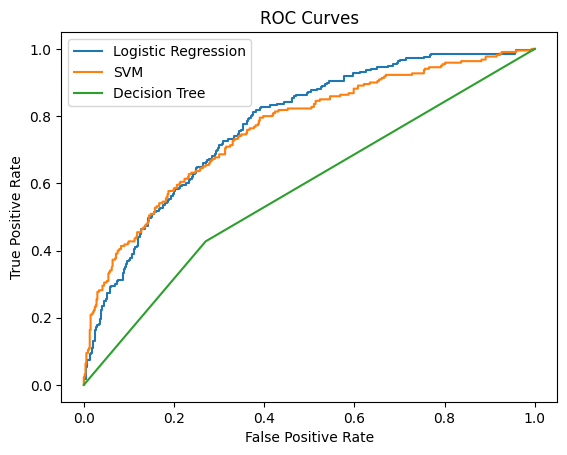

In [10]:
# Function to evaluate models
def evaluate_model(y_true, y_pred, model_name):
    print(f"Performance of {model_name}:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("ROC-AUC Score:", roc_auc_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred), "\n")

# Predictions and evaluation
for model, name in zip([logreg, tree, svm], ["Logistic Regression", "Decision Tree", "SVM"]):
    y_pred = model.predict(X_test)
    evaluate_model(y_test, y_pred, name)

# ROC Curves for Logistic Regression and SVM
y_pred_logreg_proba = logreg.predict_proba(X_test)[:, 1]
y_pred_svm_proba = svm.predict_proba(X_test)[:, 1]
y_pred_tree_proba = tree.predict_proba(X_test)[:, 1]

fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_logreg_proba)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm_proba)
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_pred_tree_proba)


plt.plot(fpr_logreg, tpr_logreg, label='Logistic Regression')
plt.plot(fpr_svm, tpr_svm, label='SVM')
plt.plot(fpr_tree, tpr_tree, label='Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()


# **Logistic Regression:**

Hyperparameter tuning with cross-validation to optimize a Logistic Regression model for predicting 10-year mortality, then applies the best model to make predictions on the entire dataset.


In [11]:
# ---------- Logistic Regression Model ----------
# Hyperparameter Tuning
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2']}
logreg = LogisticRegression(solver='liblinear', max_iter=1000)
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Best model from grid search
best_logreg = grid_search.best_estimator_
# Train the model on full data (optional, recommended for final model)
best_logreg.fit(data[numerical_features], y)

# Predicting 10-Year Mortality for all patients in the dataset
data['Predicted_10_Year_Mortality'] = best_logreg.predict(data[numerical_features])
data['Predicted_10_Year_Mortality_Probability'] = best_logreg.predict_proba(data[numerical_features])[:, 1]

# Display the dataset with predictions
print(data[['Patient ID', '10_Year_Mortality', 'Predicted_10_Year_Mortality', 'Predicted_10_Year_Mortality_Probability']].head(15))


   Patient ID  10_Year_Mortality  Predicted_10_Year_Mortality  \
0     MB-0000                  0                            1   
1     MB-0002                  0                            0   
2     MB-0005                  0                            0   
3     MB-0006                  0                            0   
4     MB-0008                  1                            1   
5     MB-0010                  1                            1   
6     MB-0014                  0                            0   
7     MB-0020                  1                            1   
8     MB-0022                  1                            0   
9     MB-0025                  0                            1   
10    MB-0028                  1                            1   
11    MB-0035                  1                            0   
12    MB-0036                  0                            1   
13    MB-0039                  0                            0   
14    MB-0045            

This end-to-end workflow not only demonstrates effective modeling techniques in survival analysis but also emphasizes the importance of thorough data preprocessing, robust evaluation methods, and optimization strategies. The final model's predictions can inform patient management and potentially guide treatment decisions in a clinical setting, highlighting the value of predictive analytics in healthcare.

This output effectively illustrates the practical application of the logistic regression model in predicting long-term mortality outcomes. The combination of binary predictions and probability estimates provides a detailed understanding of each patient's risk profile, aiding healthcare decision-making and enhancing patient management strategies.